In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.2f}'.format #para arreglar la notacion cientifica

In [28]:
#Usar el area del monitor widescreen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Kickstarter Projects

---
###### Sobre el Proyecto:

Ingestar, explorar, preparar, evaluar y visualizar detalles sobre el exito y fracaso de los proyectos propuestos en **Kickstarter** basado en el set de datos que se encuentra en: https://www.kaggle.com/kemical/kickstarter-projects

###### Que es Kickstarter?

> Kickstarter es una plataforma que provee a artistas, músicos, cineastas, diseñadores y otros creadores con los recursos y el apoyo necesarios para llevar sus ideas a la realidad. 

###### Informacion general de los Proyectos suminstrada por Kickstarter.com:
    Indice de exito actual:                            36,92%
    Contribuciones a proyectos financiados con exito: $3,78 B
    Proyectos activos:                                 3.857

## 1. Ingesta y exploracion:
---
En esta parte nos dedicaremos a ingestar los datos y luego obtner detalles de los mismos que nos permitan entender los datos y como estan relacionados entre si, ademas de buscar puntos de mejora y posibles ajustes a realizar antes de la evaluacion.

In [54]:
#Carga de archivos en diferentes dataframes
data = pd.read_csv('data/ks-projects-201801.csv', low_memory=False)

##### Prevista de primeras lineas:

In [55]:
data.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline                 goal  \
0          Poetry    Publishing      GBP  2015-10-09             1,000.00   
1  Narrative Film  Film & Video      USD  2017-11-01            30,000.00   
2  Narrative Film  Film & Video      USD  2013-02-26            45,000.00   
3           Music         Music      USD  2012-04-16             5,000.00   
4    Film & Video  Film & Video      USD  2015-08-29            19,500.00   

              launched              pledged     state  backers country  \
0  2015-08-11 12:12:28                 0.00    failed        0      GB   
1  2017-09-02 04:43:57             2,421.00    failed       15      US   
2  2013-01-12 00:20:50               220.00    failed        3      US   
3  2012-03-17 03:24:11                 1.00    failed        1      US   
4  2015-07-04 08:35:03             1,283.00  canceled       14      US   

           usd pledged     usd_pledged_real        usd_goal_real  
0                 0.00                 0.00             1,533.95  
1               100.00             2,421.00            30,000.00  
2               220.00               220.00            45,000.00  
3                 1.00                 1.00             5,000.00  
4             1,283.00             1,283.00            19,500.00

In [58]:
#Detalles del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Notas:
1. *La cantidad de dinero aportado (usd pledged) no se encuentra 100% poblada (3.797 valores nulos)*
2. *El set de datos contiene las columnas usd_pledged_real y usd_goal_real que fueron obtenidas por una herramienta externa que realizo una conversion de moneda basado en la fecha final del proyecto y que se encuentran 100% pobladas*

In [57]:
#Detalle de los valores numericos
data.describe()

ID                 goal              pledged  \
count           378,661.00           378,661.00           378,661.00   
mean      1,074,731,191.99            49,080.79             9,682.98   
std         619,086,204.32         1,183,391.26            95,636.01   
min               5,971.00                 0.01                 0.00   
25%         538,263,516.00             2,000.00                30.00   
50%       1,075,275,634.00             5,200.00               620.00   
75%       1,610,148,624.00            16,000.00             4,076.00   
max       2,147,476,221.00       100,000,000.00        20,338,986.27   

                   backers          usd pledged     usd_pledged_real  \
count           378,661.00           374,864.00           378,661.00   
mean                105.62             7,036.73             9,058.92   
std                 907.19            78,639.75            90,973.34   
min                   0.00                 0.00                 0.00   
25%                   2.00                16.98                31.00   
50%                  12.00               394.72               624.33   
75%                  56.00             3,034.09             4,050.00   
max             219,382.00        20,338,986.27        20,338,986.27   

             usd_goal_real  
count           378,661.00  
mean             45,454.40  
std           1,152,950.06  
min                   0.01  
25%               2,000.00  
50%               5,500.00  
75%              15,500.00  
max         166,361,390.71

Notas:
1. *La cantidad de USD promedio para lograr alcanzar el objetivo de un proyecto es de \$45,454*
2. *La candidad promedio de dinero aportardo en un proyecto es de \$9,058*
3. *La cantidad promedio de persona que brindan soporte a un proyecto es de 105*
4. *La maxima cantidad de dinero solicitado para un proyecto es de mas de \$166 millones*
5. *La maxima cantidad de dinero recaudado para un proyecto es de mas de \$20 millones*

In [62]:
#Valores unicos por columna
data.apply(pd.Series.nunique)

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

Notas:
1. *Hay un posible correlacion entre category y main_category*
2. *Hay 14 posibles tipos de moneda*
3. *Un proyecto puede tener 6 estados diferentes*
4. *Hay proyectos de 23 paises diferentes*

#### Categorias

In [131]:
#Validacion de relacion entre category y main_category
data.groupby(['main_category', 'category']).size()

main_category  category         
Art            Art                  8253
               Ceramics              305
               Conceptual Art       1030
               Digital Art          1346
               Illustration         3175
               Installations         482
               Mixed Media          2757
               Painting             3294
               Performance Art      2154
               Public Art           3077
               Sculpture            1810
               Textiles              276
               Video Art             194
Comics         Anthologies           405
               Comic Books          2743
               Comics               4996
               Events                163
               Graphic Novels       1864
               Webcomics             648
Crafts         Candles               429
               Crafts               4664
               Crochet               162
               DIY                  1173
               Embroider

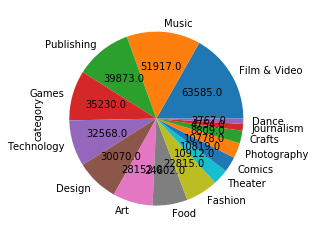

In [130]:
data.dropna(subset=["main_category"])
datos = data.groupby("main_category")["category"].count().sort_values(ascending=False)[:15]

def obtenerLabel(percentage):
    label = datos.sum()*percentage//100
    return str(label)

datos.plot(kind="pie", autopct=obtenerLabel)

#### Moneda

In [105]:
#dist
data.groupby(['currency']).size()

currency
AUD      7950
CAD     14962
CHF       768
DKK      1129
EUR     17405
GBP     34132
HKD       618
JPY        40
MXN      1752
NOK       722
NZD      1475
SEK      1788
SGD       555
USD    295365
dtype: int64

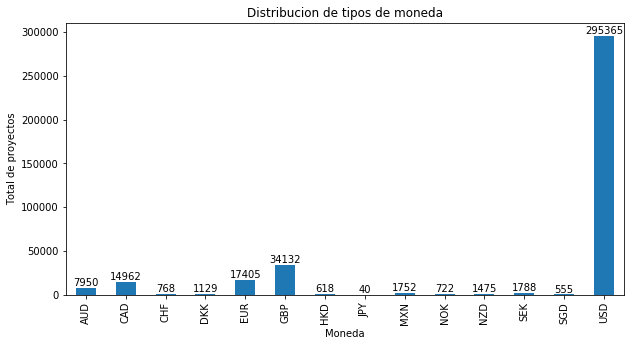

In [129]:
valores = data.groupby('currency')['currency'].count()

# Plot the figure.
plt.figure(figsize=(10, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de tipos de moneda')
ax.set_xlabel('Moneda')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')


Nota:
 1. *La columna usd_pledged_real convierte el valor monetario de las monedas que no son norteamericanas a USD*

#### Estados de Proyectos

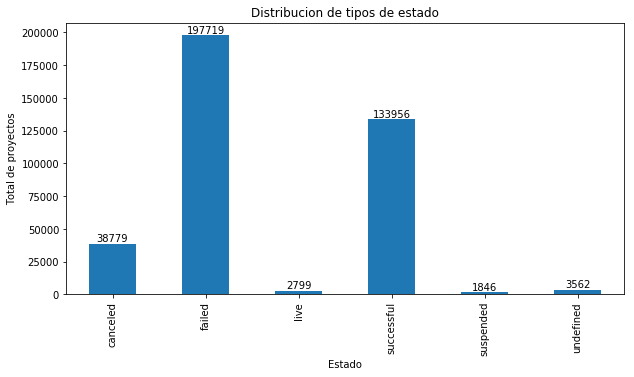

In [137]:
valores = data.groupby('state')['state'].count()

# Plot the figure.
plt.figure(figsize=(10, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de tipos de estado')
ax.set_xlabel('Estado')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')


Nota:
1. *Para propositos de la evaluacion solo serian de interes los estados failed y sucessful*

#### Paises

In [138]:
data.groupby(['country']).size()

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
dtype: int64

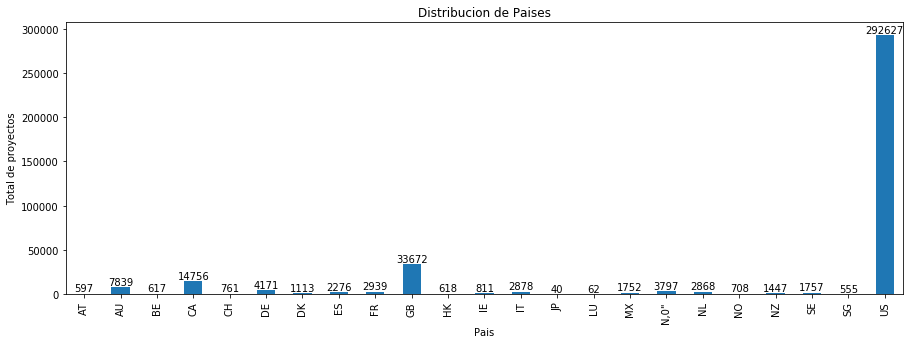

In [140]:
valores = data.groupby('country')['country'].count()

# Plot the figure.
plt.figure(figsize=(15, 5))
ax = valores.plot(kind='bar')
ax.set_title('Distribucion de Paises')
ax.set_xlabel('Pais')
ax.set_ylabel('Total de proyectos')

barras = ax.patches

for barra, label in zip(barras, valores.values):
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height, str(label)[:7],
            ha='center', va='bottom')

Notas:
1. *Hay 3,797 registros con un codigo de pais invalido: N,0"

## 2. Preparacion de los datos:
---
Luego de evaluar los datos procedemos a definir y aplicar reglas de datos para remover, consolidar y en general preparar los datos para su evaluacion (relacionada al proposito del proyecto)